In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim
from torchvision import datasets, transforms

import zipfile

import shutil
import os
import pandas as pd

device = ("cuda" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

In [2]:
'''with zipfile.ZipFile("celeba.zip","r") as zip_ref:
  zip_ref.extractall("data_faces/")'''

'with zipfile.ZipFile("celeba.zip","r") as zip_ref:\n  zip_ref.extractall("data_faces/")'

In [3]:

root = '/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba'
img_list = os.listdir(root)
print(len(img_list))

202599


In [4]:

df = pd.read_csv("/home/luser/autoencoder_attacks/train_aautoencoders/list_attr_celeba.csv")
#df = df[['image_id', 'Smiling']]

In [5]:
df
#get all the row titles
df.index
# get all the column titles
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:
# to make directories

'''!rm -rf data
!mkdir data && mkdir data/smile && mkdir data/no_smile'''

'!rm -rf data\n!mkdir data && mkdir data/smile && mkdir data/no_smile'

In [7]:

s0 = 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0
s6 = 0
s7 = 0

num = 700000

for i, (_, i_row) in enumerate(df.iterrows()):
  '''if s0 < num: # for bald
    if i_row['Bald'] == 1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s0 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald/bald_disjoined/' + i_row['image_id'])
  
  if s1 < num: # for hat
    #if i_row['Wearing_Hat'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == 1 and i_row['No_Beard'] == 1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_hat/Wearing_Hat_disjoined/' + i_row['image_id'])
  
  if s1 < num: # for beard
    #if i_row['No_Beard'] == -1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == -1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbeard/withBeard_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Eyeglasses'] == 1 and i_row['Gray_Hair'] == 1  and i_row['Young'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebAblackWomenGlasses_d/black_women_eyeglass_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Eyeglasses'] == 1 and i_row['Gray_Hair'] == 1  and i_row['Young'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebAoldWomenGlasses_d/old_women_eyeglass_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1:     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_blackWomen_d/blackWomen_disjoined/' + i_row['image_id'])'''


  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Blond_Hair'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_whiteWomen/whiteWomen_d/' + i_row['image_id'])'''


  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_generalWhiteWomen_d/generalWhiteWomen_disjoined/' + i_row['image_id'])'''


  '''if s1 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 :     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_blackMen_d/blackMen_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_generalWhiteMen_d/generalWhiteMen_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == 1 and i_row['Male'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined' + i_row['image_id'])

  if s2 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == 1 and i_row['Male'] == -1 :      
      s2 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined/' + i_row['image_id'])

  if s3 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == -1 and i_row['Male'] == 1 and i_row['Gray_Hair'] == 1 :      
      s3 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined/' + i_row['image_id'])

  if s4 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == -1 and i_row['Male'] == -1 and i_row['Gray_Hair'] == 1:      
      s4 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined/' + i_row['image_id'])'''


  if s0 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :     
      s0 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_youngblackWomen_d/youngblackWomen_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Young'] == -1 :     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldblackWomen_d/oldblackWomen_disjoined/' + i_row['image_id'])

  if s2 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :      
      s2 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_younggeneralWhiteWomen_d/younggeneralWhiteWomen_disjoined/' + i_row['image_id'])


  if s3 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Young'] == -1 and i_row['Gray_Hair'] == 1 :      
      s3 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldgeneralWhiteWomen_d/oldgeneralWhiteWomen_disjoined/' + i_row['image_id'])

  if s4 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :     
      s4 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_youngblackMen_d/youngblackMen_disjoined/' + i_row['image_id'])


  if s5 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Young'] == -1 :     
      s5 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldblackMen_d/oldblackMen_disjoined/' + i_row['image_id'])


  if s6 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :      
      s6 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_younggeneralWhiteMen_d/younggeneralWhiteMen_disjoined/' + i_row['image_id'])


  if s7 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 and i_row['Young'] == -1 and i_row['Gray_Hair'] == 1 :      
      s7 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldgeneralWhiteMen_d/oldgeneralWhiteMen_disjoined/' + i_row['image_id'])


  if s0 == num and s1 == num and s2 == num and s3 == num and s4 == num  and s5 == num  and s6 == num  and s7 == num:
    break

IndentationError: unexpected indent (2524625619.py, line 42)

In [7]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
all_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
all_men_list = os.listdir(all_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all men List: ", len(all_men_list))

all men List:  84434


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
all_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
all_women_list = os.listdir(all_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all women List: ", len(all_women_list))

all women List:  118165


In [9]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_young_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
all_young_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
all_young_list = os.listdir(all_young_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all young List: ", len(all_young_list))

all young List:  156734


In [10]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_old_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
all_old_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
all_old_list = os.listdir(all_old_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all old List: ", len(all_old_list))

all old List:  45865


In [11]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
young_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
young_men_list = os.listdir(young_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young men List: ", len(young_men_list))

young men List:  53447


In [12]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
old_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
old_men_list = os.listdir(old_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old men List: ", len(old_men_list))

old men List:  7003


In [13]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
old_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
old_women_list = os.listdir(old_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old women List: ", len(old_women_list))

old women List:  1116


In [14]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
young_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
young_women_list = os.listdir(young_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young women List: ", len(young_women_list))

young women List:  103287


In [396]:
import torch

import torch.nn as nn

#from nvae.utils import add_sn
#from nvae.vae_celeba import NVAE
import numpy as np
import matplotlib.pyplot as plt
#from nvae.utils import reparameterize


device = ("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

from vae import VAE_big

model = VAE_big(device, image_channels=3).to(device)

train_data_size = 162079
epochs = 199

beta_value = 10.0

if(beta_value == 1.0):
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
else:
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))

model.eval()


VAE_big(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2))
    (13): ReLU()
    (14): Flatten()
  )
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1024, bias=True)
  (decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(1024, 256, kernel_size=(5, 5), stride=(2, 2))
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kern

In [397]:
parent_addresses = [all_men_parent, all_women_parent, all_young_parent, all_old_parent, young_men_parent, old_men_parent, young_women_parent, old_women_parent]
considered_lists = [all_men_list, all_women_list, all_young_list, all_old_list, young_men_list, old_men_list, young_women_list, old_women_list]

In [398]:
all_latent_groups_merged = torch.tensor([]).to(device)

for ind in range(4, 8):
    print("ind: ", ind)
    transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
            ])

    batch_size = 1000

    print("parent_addresses[ind]: ", parent_addresses[ind])

    celeba_data = datasets.ImageFolder(parent_addresses[ind], transform=transform)
    print("celeba_data: ", len(celeba_data))
    considered_list = considered_lists[ind]

    print("considered_list: ", len(considered_list))

    train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 1.0), len(considered_list) - int(len(considered_list) * 1.0)])
    train_data_size = len(train_set)
    test_data_size = len(test_set)

    trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)


    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)
        break


    model.eval()
    with torch.no_grad():
        ae_perturbed_embeds = model.encoder(images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
        mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
        std1 = logvar1.mul(0.5).exp_()
        esp1 = torch.randn(*mu1.size()).to(device)
        z1 = mu1 + std1 * esp1
    print("z1.shape", z1.shape)
    all_latent_groups_merged = torch.cat((all_latent_groups_merged, z1), 0)
    print("all_latent_groups_merged.shape", all_latent_groups_merged.shape)


ind:  4
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d
celeba_data:  53447
considered_list:  53447
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([1000, 256])
ind:  5
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d
celeba_data:  7003
considered_list:  7003
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([2000, 256])
ind:  6
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d
celeba_data:  103287
considered_list:  103287
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([3000, 256])
ind:  7
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d
celeba_data:  1116
considered_list:  1116
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([40

In [399]:
z1.shape

torch.Size([1000, 256])

In [400]:
import torch
import numpy as np
from openTSNE import TSNE
from openTSNE.affinity import PerplexityBasedNN

# Check if a GPU is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Assuming your data is a torch tensor of size [63325, 256]
#data = torch.randn(63325, 256)  # Example tensor
data = all_latent_groups_merged.to(device)

# Convert the tensor to a NumPy array
data_np = data.cpu().numpy()

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    n_jobs=-1,
    random_state=42,
    negative_gradient_method="fft"  # Use FFT-based gradient calculation for speed
)

# Fit and transform the data
embedding = tsne.fit(data_np)

# Convert the result back to a torch tensor
data_tsne_tensor = torch.tensor(embedding, device=device)

# Check the size of the reduced tensor
print(data_tsne_tensor.shape)  # Should print torch.Size([63325, 2])


torch.Size([4000, 2])


In [401]:
data_tsne_tensor = data_tsne_tensor.cpu().numpy()   

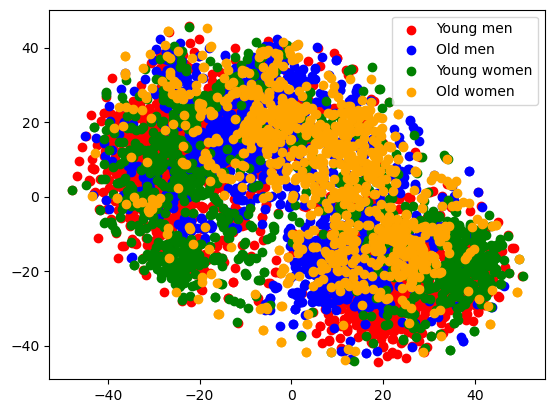

In [402]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

# Plot each group separately with specified colors and labels
plt.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0])
plt.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1])
plt.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2])
plt.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3])

# Add legend
plt.legend()

# Show plot
plt.show()


In [283]:
data_tsne_tensor.shape

(4000, 2)

# DBSCAN clustering

In [320]:
import torch
import numpy as np
from sklearn.cluster import DBSCAN

# Assuming your data is a torch tensor of size [4000, 256]
#data = torch.randn(4000, 256)  # Example tensor

# Convert the tensor to a NumPy array
data_np = data_tsne_tensor

# Initialize the DBSCAN object
dbscan = DBSCAN(eps=5.0, min_samples=80, n_jobs=-1)

# Fit and predict the clusters
clusters = dbscan.fit_predict(data_np)

# Convert the result back to a torch tensor if needed
clusters_tensor = torch.tensor(clusters)

# Check the size of the clusters tensor
print(clusters_tensor.shape)  # Should print torch.Size([4000])

# Optionally, inspect the cluster assignments
print(clusters_tensor)


torch.Size([4000])
tensor([-1,  1,  1,  ...,  0,  1, -1])


In [321]:

clusters_tensor.max(), clusters_tensor.min()

(tensor(3), tensor(-1))

In [322]:
for i in range(4):
    print(i, np.unique(clusters_tensor[i*batch_size:(i+1)*batch_size], return_counts=True))


0 (array([-1,  0,  1,  2,  3]), array([327, 266, 351,  22,  34]))
1 (array([-1,  0,  1,  2,  3]), array([338, 217, 423,   5,  17]))
2 (array([-1,  0,  1,  2,  3]), array([310, 149, 335, 167,  39]))
3 (array([-1,  0,  1,  2,  3]), array([368, 226, 378,   8,  20]))


In [331]:
len(np.where(clusters_tensor==-1)[0]), len(np.where(clusters_tensor==0)[0]), len(np.where(clusters_tensor==1)[0]), len(np.where(clusters_tensor==2)[0]), len(np.where(clusters_tensor==3)[0])

(1343, 858, 1487, 202, 110)

In [329]:
np.where(clusters_tensor==-1)[0]

array([   0,    4,    5, ..., 3993, 3994, 3999])

In [364]:
cluster_1_inds = np.where(clusters_tensor==0)[0]
len(cluster_1_inds[cluster_1_inds<1000]), len(cluster_1_inds[(1000<cluster_1_inds) & (cluster_1_inds<2000)]), len(cluster_1_inds[(2000<cluster_1_inds) & (cluster_1_inds<3000)]), len(cluster_1_inds[cluster_1_inds>3000])

(266, 217, 149, 226)

In [365]:
cluster_1_inds = np.where(clusters_tensor==1)[0]
len(cluster_1_inds[cluster_1_inds<1000]), len(cluster_1_inds[(1000<cluster_1_inds) & (cluster_1_inds<2000)]), len(cluster_1_inds[(2000<cluster_1_inds) & (cluster_1_inds<3000)]), len(cluster_1_inds[cluster_1_inds>3000])

(351, 422, 334, 377)

In [366]:
cluster_1_inds = np.where(clusters_tensor==2)[0]
len(cluster_1_inds[cluster_1_inds<1000]), len(cluster_1_inds[(1000<cluster_1_inds) & (cluster_1_inds<2000)]), len(cluster_1_inds[(2000<cluster_1_inds) & (cluster_1_inds<3000)]), len(cluster_1_inds[cluster_1_inds>3000])

(22, 5, 167, 8)

In [367]:
cluster_1_inds = np.where(clusters_tensor==3)[0]
len(cluster_1_inds[cluster_1_inds<1000]), len(cluster_1_inds[(1000<cluster_1_inds) & (cluster_1_inds<2000)]), len(cluster_1_inds[(2000<cluster_1_inds) & (cluster_1_inds<3000)]), len(cluster_1_inds[cluster_1_inds>3000])

(34, 17, 39, 20)

# Do TSNE to 3 dimensions and plot